To run this file on Colab [click here](https://colab.research.google.com/github/sanjaydasgupta/data-mining-of-website-articles/blob/master/ml-blogs-eda.ipynb)

In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.manifold import TSNE

In [21]:
df = pd.read_csv('https://raw.githubusercontent.com/sanjaydasgupta/data-mining-of-website-articles/master/articles.csv')
df.shape

(622, 8)

In [22]:
df.tail(5)

,Unnamed: 0,datetime,author,author_url,title,url,summary,page_no
617,617,2013-10-21T21:27:05+05:30,Tavish Srivastava,https://www.analyticsvidhya.com/blog/author/ta...,Trick to enhance power of Regression model,https://www.analyticsvidhya.com/blog/2013/10/t...,"We, as analysts, specialize in optimization of...",45
618,618,2020-10-01T15:49:19+05:30,NaN,NaN,HackLive – Everything You Need to Get Started ...,https://www.analyticsvidhya.com/blog/2020/10/h...,NaN,45
619,619,2020-10-01T13:22:23+05:30,NaN,NaN,7 Feature Engineering Techniques in Machine Le...,https://www.analyticsvidhya.com/blog/2020/10/7...,NaN,45
620,620,2020-09-30T13:28:08+05:30,NaN,NaN,Hypothesis Generation for Data Science Project...,https://www.analyticsvidhya.com/blog/2020/09/h...,NaN,45
621,621,2020-09-30T12:17:06+05:30,NaN,NaN,How Machine Learning Models Fail to Deliver in...,https://www.analyticsvidhya.com/blog/2020/09/h...,NaN,45


In [46]:
df621 = df.iloc[:622, :].copy()
vectorizer = TfidfVectorizer(stop_words='english').fit(df621['title'])
tfidf = vectorizer.transform(df621['title'])

In [47]:
tsne_xy = TSNE(random_state=42).fit_transform(tfidf)
df621['tsne_x'] = tsne_xy[:, 0]
df621['tsne_y'] = tsne_xy[:, 1]

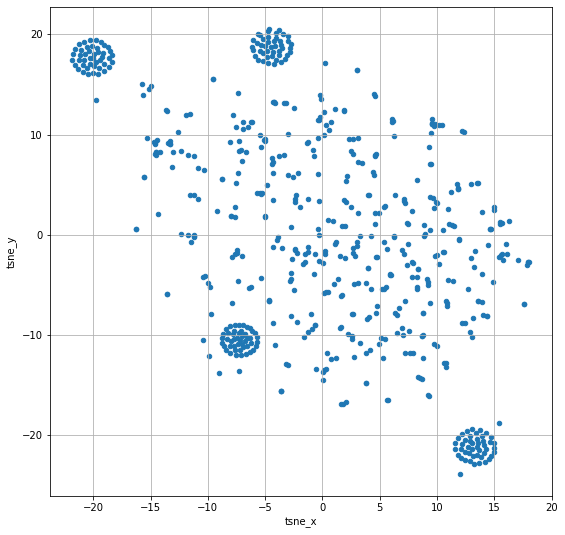

In [48]:
ax = df621.plot(kind='scatter', x='tsne_x', y='tsne_y', figsize=(9, 9), grid=True)

## Remove unpublished records

In [49]:
df_valid = df[df['summary'].notnull()].copy()
print(df_valid.shape)
vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1, 2)).fit(df_valid['title'])
print(len(vectorizer.vocabulary_))
print(vectorizer.vocabulary_)
tfidf = vectorizer.transform(df_valid['title'])

(442, 8)
3148
{'feature': 969, 'engineering': 875, 'techniques': 2723, 'machine': 1636, 'learning': 1489, 'know': 1431, 'feature engineering': 970, 'engineering techniques': 880, 'techniques machine': 2728, 'machine learning': 1637, 'learning know': 1532, 'cyber': 704, 'security': 2446, 'malicious': 1653, 'software': 2556, 'installation': 1299, 'learning cyber': 1511, 'cyber security': 705, 'security malicious': 2447, 'malicious software': 1654, 'software installation': 2557, 'build': 452, 'sales': 2345, 'forecast': 998, 'using': 2928, 'microsoft': 1710, 'excel': 915, 'just': 1405, '10': 0, 'minutes': 1723, 'build sales': 466, 'sales forecast': 2346, 'forecast using': 1000, 'using microsoft': 2951, 'microsoft excel': 1711, 'excel just': 918, 'just 10': 1406, '10 minutes': 6, 'master': 1673, 'popular': 2013, 'dbscan': 758, 'clustering': 557, 'algorithm': 169, 'master popular': 1677, 'popular dbscan': 2015, 'dbscan clustering': 759, 'clustering algorithm': 558, 'algorithm machine': 177, 

In [50]:
tsne_xy = TSNE(random_state=42).fit_transform(tfidf)
df_valid['tsne_x'] = tsne_xy[:, 0]
df_valid['tsne_y'] = tsne_xy[:, 1]

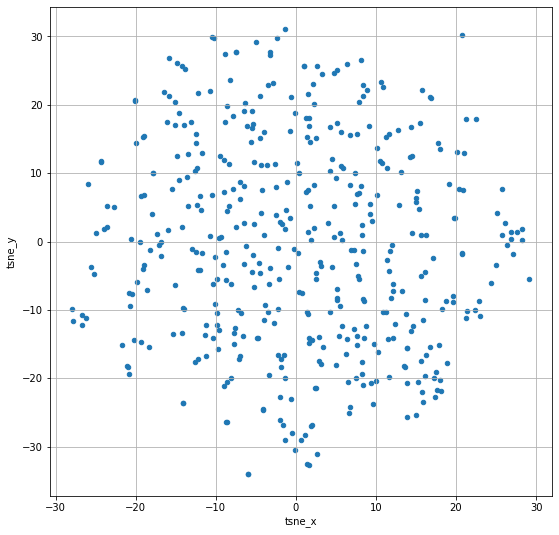

In [51]:
ax = df_valid.plot(kind='scatter', x='tsne_x', y='tsne_y', figsize=(9, 9), grid=True)

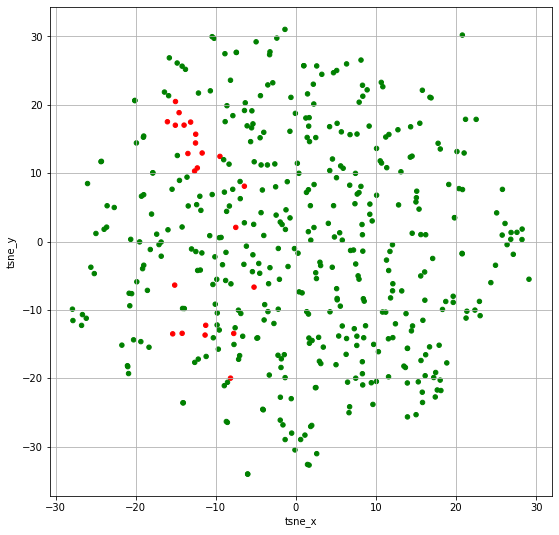

In [55]:
colors = df_valid['title'].str.lower().map(lambda t: 'red' if 'regression' in t else 'green').values
ax = df_valid.plot(kind='scatter', x='tsne_x', y='tsne_y', figsize=(9, 9), grid=True, c=colors)

In [53]:
for t in df_valid[df_valid['title'].str.lower().map(lambda t: 'classification' in t)]['title']:
  print(t)

Plotting Decision Surface for Classification Machine Learning Algorithms
Predicting Movie Genres using NLP – An Awesome Introduction to Multi-Label Classification
A Hands-On Introduction to Time Series Classification (with Python Code)
Tutorial on Text Classification (NLP) using ULMFiT and fastai Library in Python
Complete tutorial on Text Classification using Conditional Random Fields Model (in Python)
A Comprehensive Guide to Understand and Implement Text Classification in Python
Online Learning Guide with Text Classification using Vowpal Wabbit (VW)
Solving Multi-Label Classification problems (Case studies included)
Text Classification & Word Representations using FastText (An NLP library by Facebook)
Imbalanced Data : How to handle Imbalanced Classification Problems
Practical Guide to deal with Imbalanced Classification Problems in R
